In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Introduction

# Exploratory data analysis

In [16]:
df = pd.read_csv('cardiovascular_train.csv')
print(df.keys())

Index(['Age', 'Anxiety', 'BodyMassIndex', 'Depression', 'Diabetes',
       'EducationLevel', 'Hypercholesterolemia', 'Hypertension',
       'PhysicalActivity', 'Sex', 'SleepDuration', 'SmokerProfile',
       'SocioeconomicStatus'],
      dtype='object')


## Age

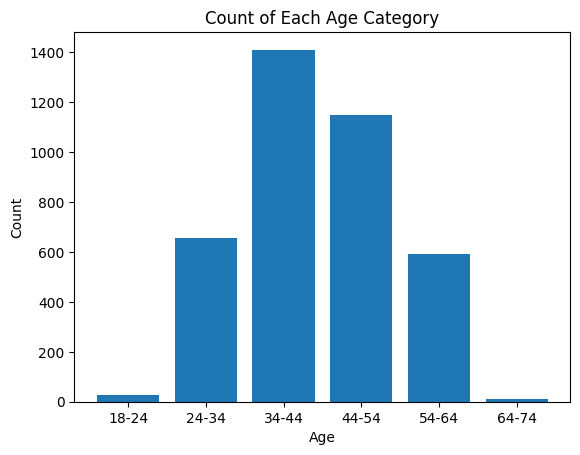

Age
18-24      28
24-34     655
34-44    1411
44-54    1148
54-64     594
64-74       9
Name: count, dtype: int64


In [11]:
age_counts = df['Age'].value_counts()

# Sorting the index for ordered display (optional)
age_counts = age_counts.sort_index()

# Creating the bar plot
plt.bar(age_counts.index, age_counts.values)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()
print(age_counts)

## Anxiety

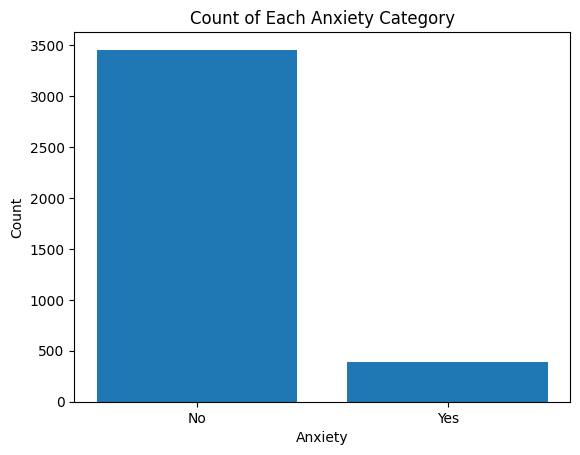

Anxiety
No     3454
Yes     391
Name: count, dtype: int64


In [17]:
anx_counts = df['Anxiety'].value_counts()

# Sorting the index for ordered display (optional)
anx_counts = anx_counts.sort_index()

# Creating the bar plot
plt.bar(anx_counts.index, anx_counts.values)

# Adding labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')

# Show the plot
plt.show()
print(anx_counts)

## BodyMassIndex

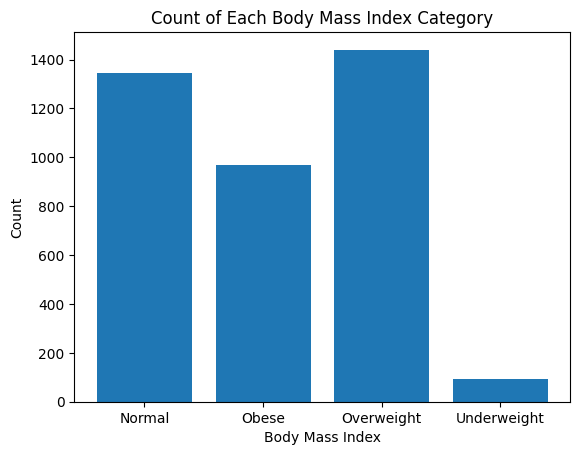

BodyMassIndex
Normal         1344
Obese           968
Overweight     1440
Underweight      93
Name: count, dtype: int64


In [20]:
bmi_counts = df['BodyMassIndex'].value_counts()

# Sorting the index for ordered display (optional)
bmi_counts = bmi_counts.sort_index()

# Creating the bar plot
plt.bar(bmi_counts.index, bmi_counts.values)

# Adding labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')

# Show the plot
plt.show()
print(bmi_counts)

## Depression

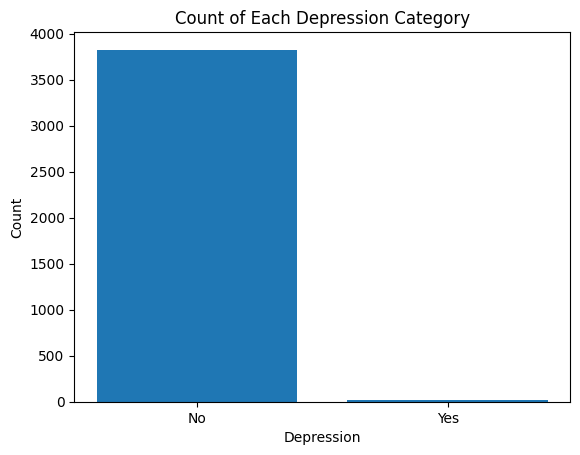

Depression
No     3824
Yes      21
Name: count, dtype: int64


In [21]:
dp_counts = df['Depression'].value_counts()

# Sorting the index for ordered display (optional)
dp_counts = dp_counts.sort_index()

# Creating the bar plot
plt.bar(dp_counts.index, dp_counts.values)

# Adding labels and title
plt.xlabel('Depression')
plt.ylabel('Count')

# Show the plot
plt.show()
print(dp_counts)

## Diabetes

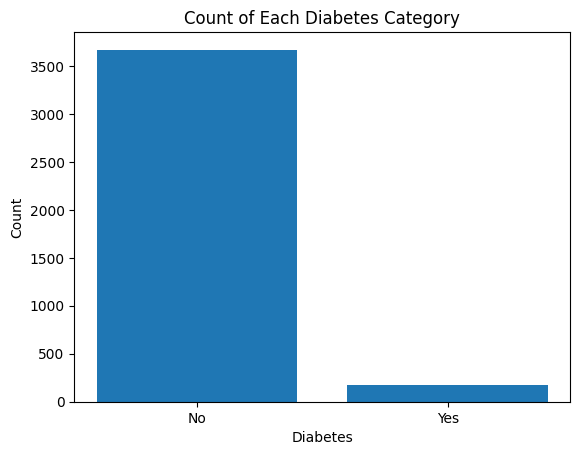

Diabetes
No     3669
Yes     176
Name: count, dtype: int64


In [22]:
db_counts = df['Diabetes'].value_counts()

# Sorting the index for ordered display (optional)
db_counts = db_counts.sort_index()

# Creating the bar plot
plt.bar(db_counts.index, db_counts.values)

# Adding labels and title
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Show the plot
plt.show()
print(db_counts)

## EducationLevel

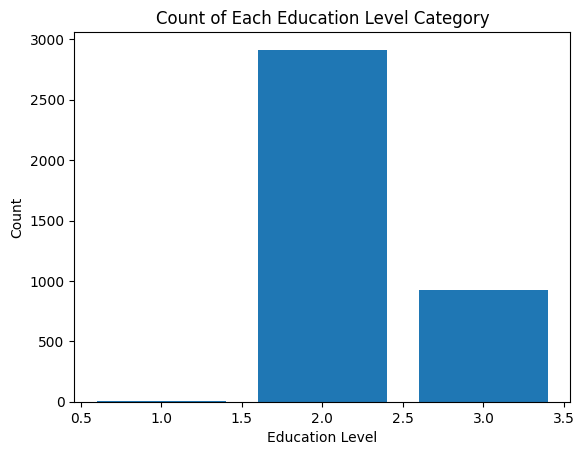

EducationLevel
1       5
2    2914
3     926
Name: count, dtype: int64


In [23]:
el_counts = df['EducationLevel'].value_counts()

# Sorting the index for ordered display (optional)
el_counts = el_counts.sort_index()

# Creating the bar plot
plt.bar(el_counts.index, el_counts.values)

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()
print(el_counts)

## Hypercholesterolemia

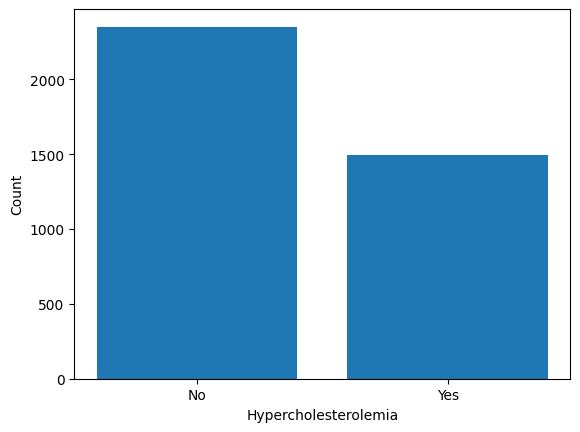

Hypercholesterolemia
No     2351
Yes    1494
Name: count, dtype: int64


In [25]:
hc_counts = df['Hypercholesterolemia'].value_counts()

# Sorting the index for ordered display (optional)
hc_counts = hc_counts.sort_index()

# Creating the bar plot
plt.bar(hc_counts.index, hc_counts.values)

# Adding labels and title
plt.xlabel('Hypercholesterolemia')
plt.ylabel('Count')

# Show the plot
plt.show()
print(hc_counts)

## Hypertension

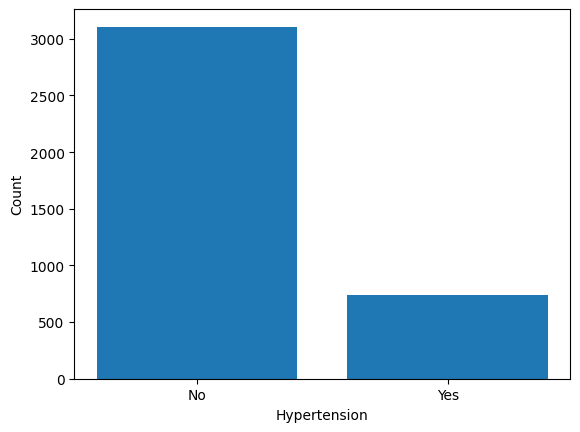

Hypertension
No     3107
Yes     738
Name: count, dtype: int64


In [26]:
ht_counts = df['Hypertension'].value_counts()

# Sorting the index for ordered display (optional)
ht_counts = ht_counts.sort_index()

# Creating the bar plot
plt.bar(ht_counts.index, ht_counts.values)

# Adding labels and title
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ht_counts)

## PhysicalActivity

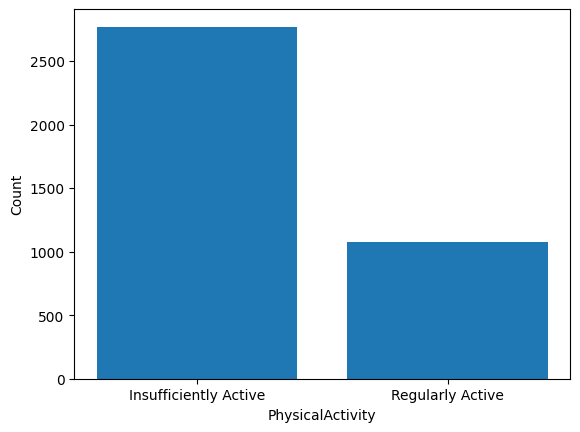

PhysicalActivity
Insufficiently Active    2770
Regularly Active         1075
Name: count, dtype: int64


In [27]:
pa_counts = df['PhysicalActivity'].value_counts()

# Sorting the index for ordered display (optional)
pa_counts = pa_counts.sort_index()

# Creating the bar plot
plt.bar(pa_counts.index, pa_counts.values)

# Adding labels and title
plt.xlabel('PhysicalActivity')
plt.ylabel('Count')

# Show the plot
plt.show()
print(pa_counts)

## Sex

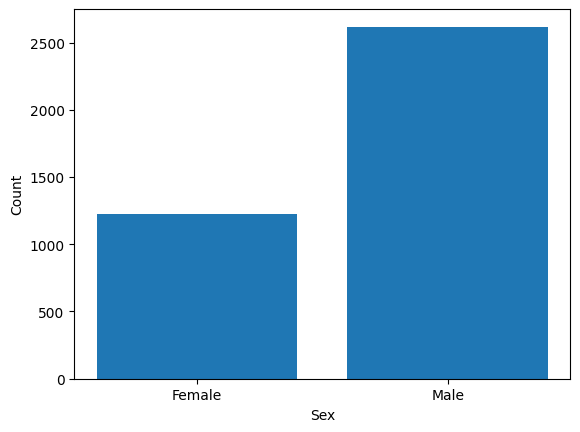

Sex
Female    1227
Male      2618
Name: count, dtype: int64


In [30]:
sex_counts = df['Sex'].value_counts()

# Sorting the index for ordered display (optional)
sex_counts = sex_counts.sort_index()

# Creating the bar plot
plt.bar(sex_counts.index, sex_counts.values)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sex_counts)

## SleepDuration

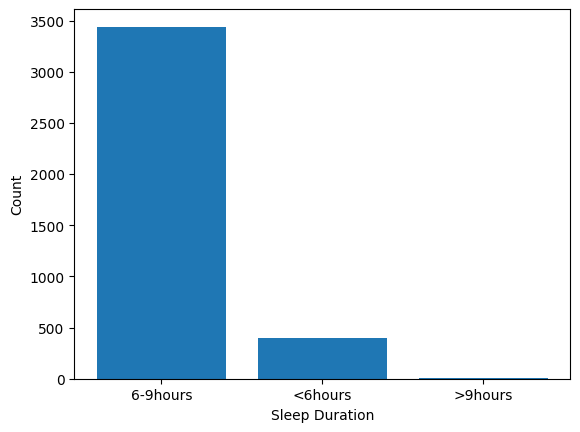

SleepDuration
6-9hours    3440
<6hours      401
>9hours        4
Name: count, dtype: int64


In [31]:
sd_counts = df['SleepDuration'].value_counts()

# Sorting the index for ordered display (optional)
sd_counts = sd_counts.sort_index()

# Creating the bar plot
plt.bar(sd_counts.index, sd_counts.values)

# Adding labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sd_counts)

## SmokerProfile

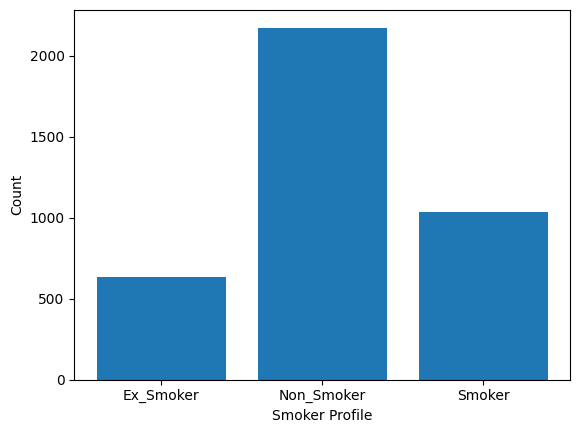

SmokerProfile
Ex_Smoker      632
Non_Smoker    2175
Smoker        1038
Name: count, dtype: int64


In [32]:
sp_counts = df['SmokerProfile'].value_counts()

# Sorting the index for ordered display (optional)
sp_counts = sp_counts.sort_index()

# Creating the bar plot
plt.bar(sp_counts.index, sp_counts.values)

# Adding labels and title
plt.xlabel('Smoker Profile')
plt.ylabel('Count')

# Show the plot
plt.show()
print(sp_counts)

## SocioeconomicStatus

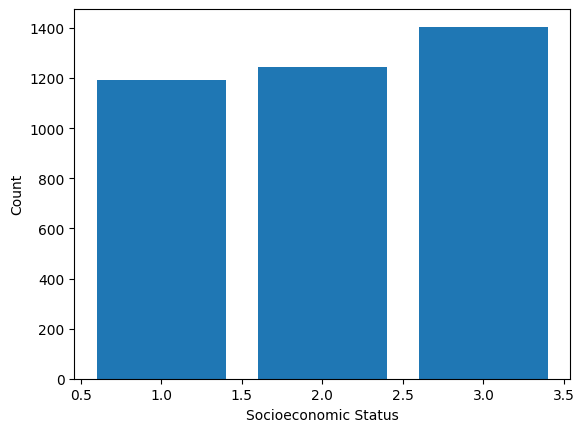

SocioeconomicStatus
1    1194
2    1246
3    1405
Name: count, dtype: int64


In [33]:
ss_counts = df['SocioeconomicStatus'].value_counts()

# Sorting the index for ordered display (optional)
ss_counts = ss_counts.sort_index()

# Creating the bar plot
plt.bar(ss_counts.index, ss_counts.values)

# Adding labels and title
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')

# Show the plot
plt.show()
print(ss_counts)

# Learn a Bayesian network from the data

# Network and problem analysis

# Classification of the three medical conditions

# Improving classification results

# Conclusion